# 0. 데이터 및 라이브러리 불러오기

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pycaret.classification import setup, compare_models, pull
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv('open/train.csv')
train.head()

,ID,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,year,month,day
0,TRAIN_0000,33,Male,Married,34,35113.78,0,Changed,Own,Monday,Local,0,No witness,42,Broker,1,2748.61,8.0,Compact,19799.63,black,11640.448729,1,2017,JUL,18
1,TRAIN_0001,44,Female,Married,90,38096.04,1,Changed,Own,Thursday,Local,0,No witness,98,Phone,0,6399.10,5.0,Compact,32068.53,blue,9139.610936,0,2016,JAN,1
2,TRAIN_0002,29,Male,Not married,70,33753.00,1,Not changed,Rent,Tuesday,Local,0,No witness,1,Online,0,4639.07,10.0,Compact,20339.02,other,19810.168367,0,2016,JUL,14
3,TRAIN_0003,33,Male,Married,79,35100.61,1,Changed,Rent,Tuesday,Highway,2,No witness,41,Broker,0,3698.98,7.0,Medium,9937.95,black,4428.144436,1,2017,JUN,14
4,TRAIN_0004,51,Male,Married,46,39609.60,1,Changed,Rent,Sunday,Local,2,Witness,98,Broker,1,2084.32,4.0,Large,24504.03,other,10119.559384,0,2017,MAY,8


# 1. 기초 EDA
Dataset Info.

ID : 고유ID

age_of driver : 운전자 나이

gender : 운전자 성별

marital_status : 결혼 상태

safty_rating : 운전자의 안전점수 (100점만점)

annual_income : 연간소득(단위:달러)

high_education_ind : 운전자의 학력

address_change_ind : 운전자의 주소변경 여부

living_status : 자동차 소유상태

claim_day_of_week : 청구된 접수된 요일

accident_site  : 사고 발생 지역

past_num_of claims : 과거 청구 건수

witness_present_ind : 목격자 여부

liab_prct : 운전자 과실 비율(%)

channel : 청구 접수 매체

policy_report_filed_ind : 경찰 신고 접수 여부

claim_est_payout : 보험금 지급 추정 비율(%) -> 추정 금액?

age_of_vehicle : 자동차 연식

vehicle_category : 자동차 카테고리

vehicle_price : 자동차 가격(단위:달러)

vehicle_color : 자동차 색깔

vehicle_weight : 자동차 무게(kg)

fraud : 사기여부

year : 청구(년)
month : 청구(월)
day : 청구(일)



In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12598 entries, 0 to 12597
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       12598 non-null  object 
 1   age_of_driver            12598 non-null  int64  
 2   gender                   12598 non-null  object 
 3   marital_status           12598 non-null  object 
 4   safty_rating             12598 non-null  int64  
 5   annual_income            12598 non-null  float64
 6   high_education_ind       12598 non-null  int64  
 7   address_change_ind       12598 non-null  object 
 8   living_status            12598 non-null  object 
 9   claim_day_of_week        12598 non-null  object 
 10  accident_site            12598 non-null  object 
 11  past_num_of_claims       12598 non-null  int64  
 12  witness_present_ind      12598 non-null  object 
 13  liab_prct                12598 non-null  int64  
 14  channel               

In [59]:
train.describe()
# age of driver, annual income의 최솟값이 이상함

,age_of_driver,safty_rating,annual_income,high_education_ind,past_num_of_claims,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud,year,day
count,12598.000000,12598.000000,12598.000000,12598.000000,12598.000000,12598.000000,12598.000000,12586.000000,12592.000000,12598.000000,12598.000000,12598.000000,12598.000000,12598.000000
mean,44.633831,73.535244,37864.439883,0.697650,0.509605,49.276076,0.602556,5052.534364,6.030575,23395.113576,10450.798875,0.156453,2016.495793,15.797031
std,11.925145,15.318958,3011.100445,0.459294,0.963423,33.607246,0.489389,2243.052796,2.256121,12116.669591,5449.618755,0.363299,0.500002,8.821139
min,1.000000,1.000000,-1.010000,0.000000,0.000000,0.000000,0.000000,286.200000,1.000000,2747.110000,1101.969696,0.000000,2016.000000,1.000000
25%,36.000000,65.000000,36005.040000,0.000000,0.000000,17.000000,0.000000,3385.572500,4.000000,14496.112500,6448.676509,0.000000,2016.000000,8.000000
50%,44.000000,76.000000,38090.400000,1.000000,0.000000,50.000000,1.000000,4743.080000,6.000000,21307.815000,9471.933883,0.000000,2016.000000,16.000000
75%,52.000000,85.000000,39821.510000,1.000000,1.000000,81.000000,1.000000,6362.112500,7.000000,29885.485000,13361.262755,0.000000,2017.000000,23.000000
max,91.000000,100.000000,55028.460000,1.000000,6.000000,100.000000,1.000000,17438.740000,16.000000,128664.510000,55799.368488,1.000000,2017.000000,31.000000


### 결측치 및 이상치 확인

In [60]:
train.isnull().sum()

ID                          0
age_of_driver               0
gender                      0
marital_status              0
safty_rating                0
annual_income               0
high_education_ind          0
address_change_ind          0
living_status               0
claim_day_of_week           0
accident_site               0
past_num_of_claims          0
witness_present_ind         0
liab_prct                   0
channel                     0
policy_report_filed_ind     0
claim_est_payout           12
age_of_vehicle              6
vehicle_category            0
vehicle_price               0
vehicle_color               0
vehicle_weight              0
fraud                       0
year                        0
month                       0
day                         0
dtype: int64

In [61]:
# 결측치가 포함된 행들을 필터링
missing_claim_est_payout = train[train['claim_est_payout'].isnull()]

# 결측치가 있는 행 확인
missing_data = pd.concat([missing_claim_est_payout])

missing_data

,ID,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,...,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,year,month,day
1743,TRAIN_1743,27,Male,Married,78,32983.42,0,Not changed,Rent,Saturday,...,NaN,4.0,Compact,19297.85,white,12452.224170,0,2016,JUL,18
2200,TRAIN_2200,42,Female,Not married,66,37601.89,1,Not changed,Own,Monday,...,NaN,7.0,Large,21441.11,gray,3116.572167,0,2016,JAN,5
4529,TRAIN_4529,69,Female,Married,82,42739.82,1,Changed,Own,Monday,...,NaN,4.0,Large,24295.21,white,13689.569654,0,2016,SEP,28
5247,TRAIN_5247,47,Female,Married,71,38755.80,1,Not changed,Own,Wednesday,...,NaN,8.0,Compact,8856.40,silver,16254.519378,0,2017,DEC,21
6303,TRAIN_6303,45,Female,Married,43,38323.34,1,Not changed,Own,Friday,...,NaN,4.0,Large,32676.63,other,23510.867405,1,2017,NOV,25
7440,TRAIN_7440,49,Male,Married,65,39202.81,1,Changed,Own,Monday,...,NaN,6.0,Compact,27232.76,red,5442.462322,0,2016,MAY,4
8235,TRAIN_8235,46,Female,Married,41,38556.28,0,Not changed,Rent,Tuesday,...,NaN,6.0,Compact,34080.90,blue,13194.026558,0,2017,MAY,31
9607,TRAIN_9607,69,Female,Married,94,42734.76,0,Not changed,Rent,Thursday,...,NaN,6.0,Large,41835.40,other,9906.228698,0,2016,DEC,3
10669,TRAIN_10669,63,Male,Married,60,41808.38,1,Changed,Own,Thursday,...,NaN,6.0,Large,20072.18,white,13212.704374,0,2017,FEB,25
10980,TRAIN_10980,50,Female,Married,4,39422.23,1,Changed,Rent,Sunday,...,NaN,8.0,Large,29267.74,other,13436.638966,1,2017,FEB,28


In [62]:
# 운전자 나이가 1로 측정된 데이터가 있음 => 제거하기
pd.DataFrame(train['age_of_driver'].value_counts()).reset_index().sort_values('age_of_driver')

,age_of_driver,count
55,1,22
71,19,2
63,20,9
53,21,29
47,22,50
...,...,...
68,87,4
70,88,3
66,89,5
73,90,1


In [63]:
# annual income = -1.01 데이터 => 제거하기
pd.DataFrame(train['annual_income'].value_counts()).reset_index().sort_values('annual_income')

,annual_income,count
103,-1.01,10
3196,29274.27,1
3589,29276.00,1
3170,29790.69,1
3317,29813.79,1
...,...,...
2617,46655.64,1
3159,47868.64,1
3437,49521.20,1
3476,53655.65,1


In [64]:
idx = train[train['age_of_driver']==1].index
train.drop(idx, inplace=True)
idx2 = train[train['annual_income']==-1.01].index
train.drop(idx2, inplace=True)

### **변수 분포 분석**

**연속형 변수 분포**

In [65]:
numerical_columns = ['age_of_driver', 'safty_rating', 'annual_income', 'past_num_of_claims', 'liab_prct', 'claim_est_payout', 'age_of_vehicle',  'vehicle_price', 'vehicle_weight']

<Figure size 1500x1000 with 0 Axes>

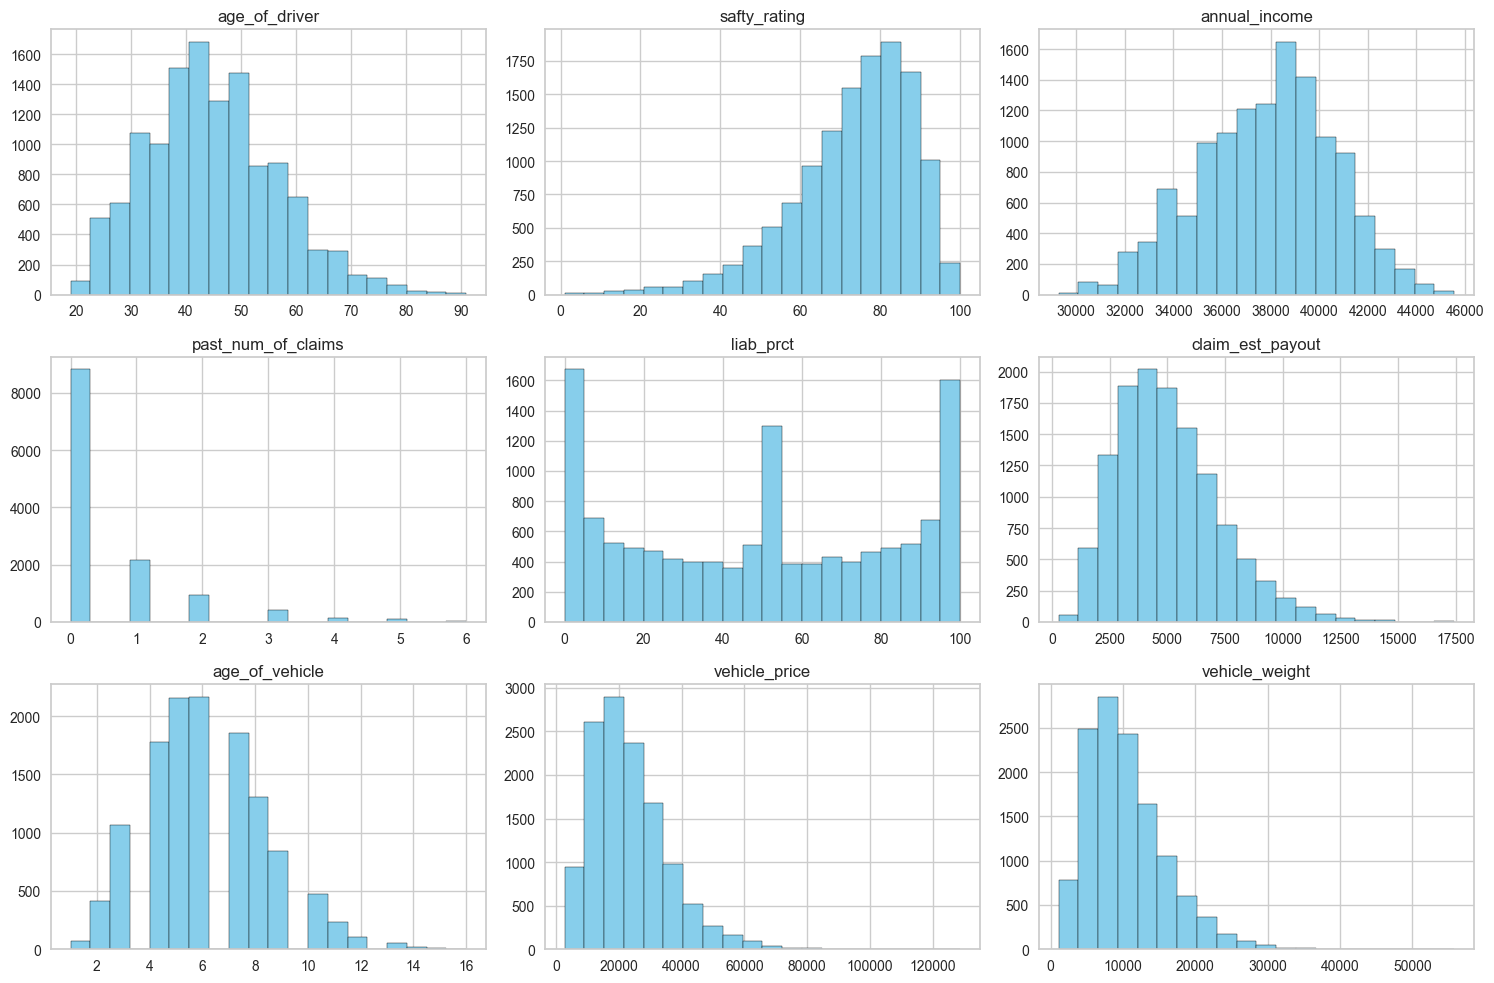

In [66]:
plt.figure(figsize=(15, 10))
train[numerical_columns].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

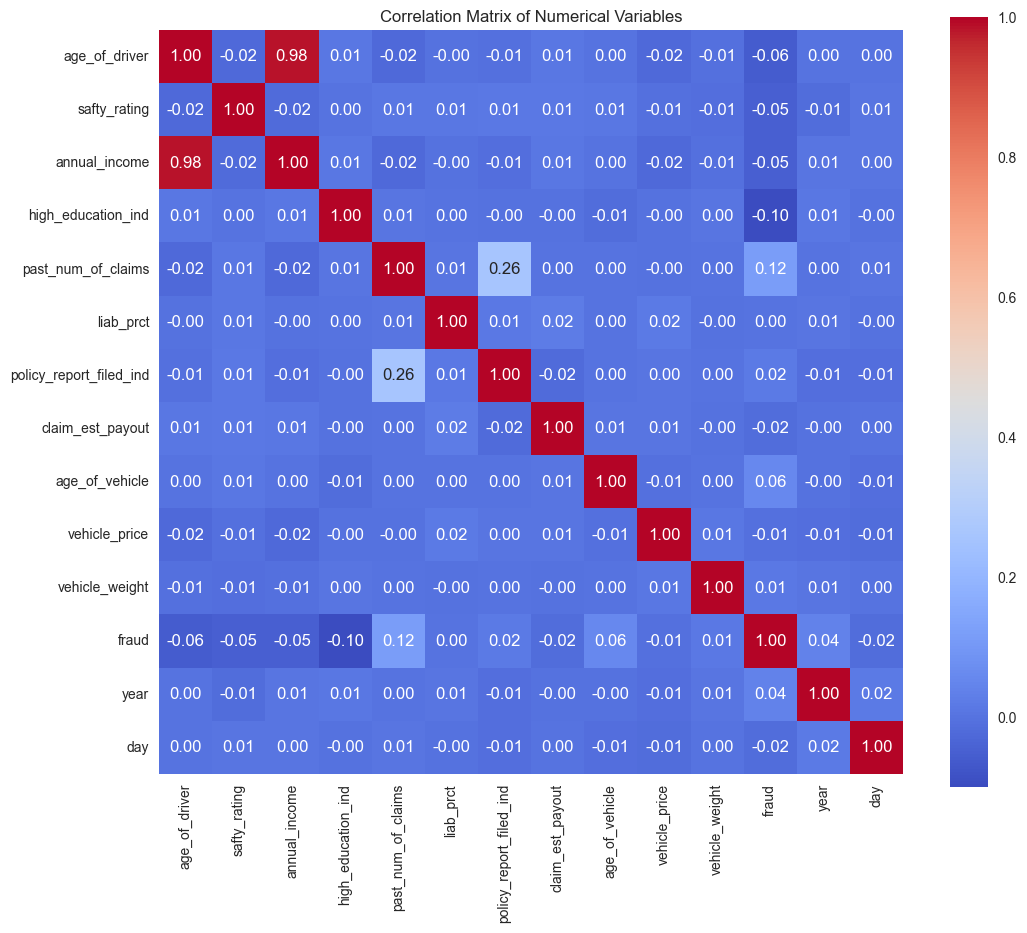

In [67]:
# 연속형 변수 선택
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns

# 상관관계 행렬 계산
correlation_matrix = train[numerical_columns].corr()

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


**범주형 변수의 범주별 비율 분석**

In [68]:
categorical_columns = ['gender', 'marital_status', 'high_education_ind', 'address_change_ind',
       'living_status', 'claim_day_of_week', 'accident_site','witness_present_ind', 'channel',
       'policy_report_filed_ind', 'vehicle_category', 'vehicle_color', 'fraud', 'month' ]

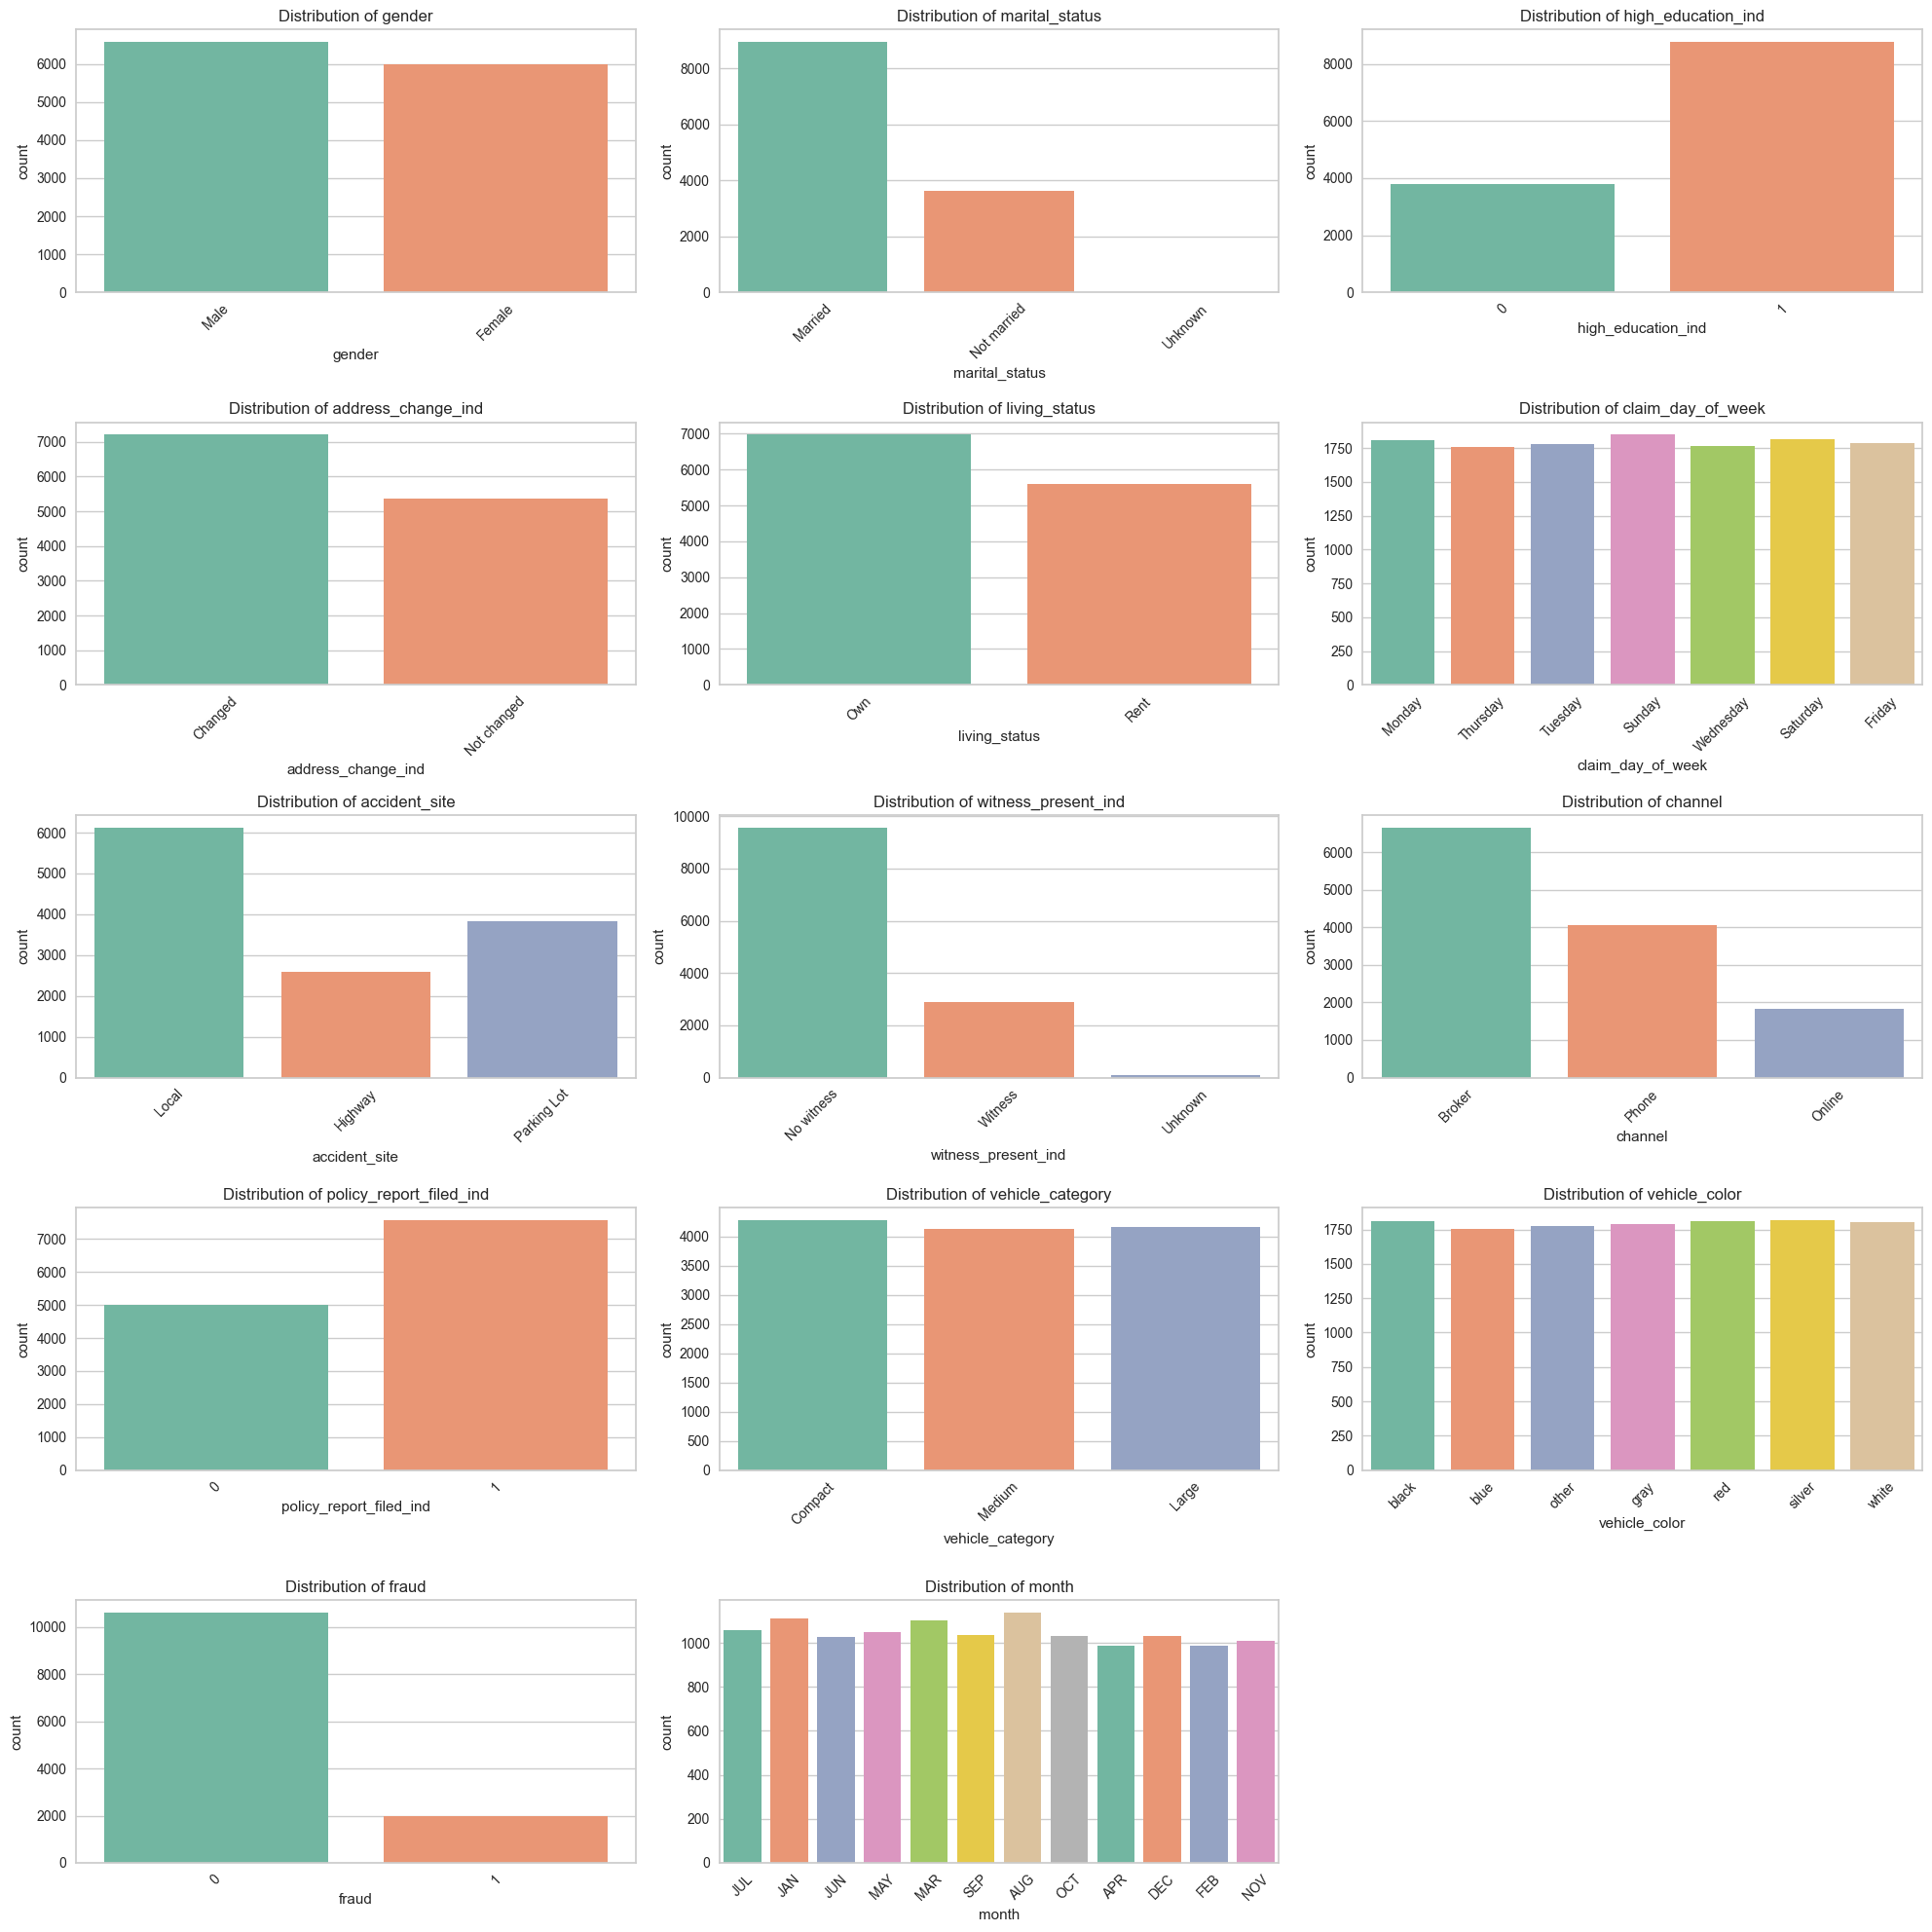

In [69]:
# 더 예쁜 색깔 팔레트를 사용하여 그래프를 그리겠습니다.
plt.figure(figsize=(20, 20))

# Set a more visually appealing color palette
colors = sns.color_palette("Set2")

for i, col in enumerate(categorical_columns):
    plt.subplot(5, 3, i + 1)
    sns.countplot(x=col, data=train, palette=colors)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Unknown이 포함된 변수에서 Unknown 값 개수 파악**

In [70]:
train['witness_present_ind'].value_counts()

witness_present_ind
No witness    9577
Witness       2908
Unknown         81
Name: count, dtype: int64

In [71]:
train['marital_status'].value_counts()

marital_status
Married        8941
Not married    3621
Unknown           4
Name: count, dtype: int64

### **Fraud 여부에 따른 EDA**
**사기 여부에 따른 데이터 개수**

In [72]:
train['fraud'].value_counts()

fraud
0    10601
1     1965
Name: count, dtype: int64

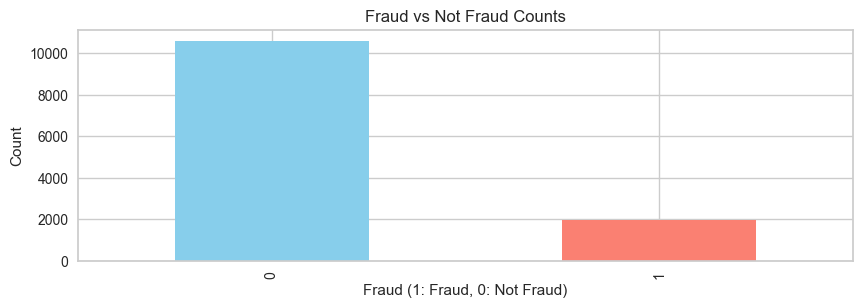

In [73]:
# 사기 여부에 따른 데이터 개수 확인
fraud_counts = train['fraud'].value_counts()

# 시각화
plt.figure(figsize=(10, 3))
fraud_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Fraud vs Not Fraud Counts')
plt.xlabel('Fraud (1: Fraud, 0: Not Fraud)')
plt.ylabel('Count')
plt.show()

In [74]:
numerical_columns

Index(['age_of_driver', 'safty_rating', 'annual_income', 'high_education_ind',
       'past_num_of_claims', 'liab_prct', 'policy_report_filed_ind',
       'claim_est_payout', 'age_of_vehicle', 'vehicle_price', 'vehicle_weight',
       'fraud', 'year', 'day'],
      dtype='object')

**사기 여부에 따른 연속형 변수들의 분포**

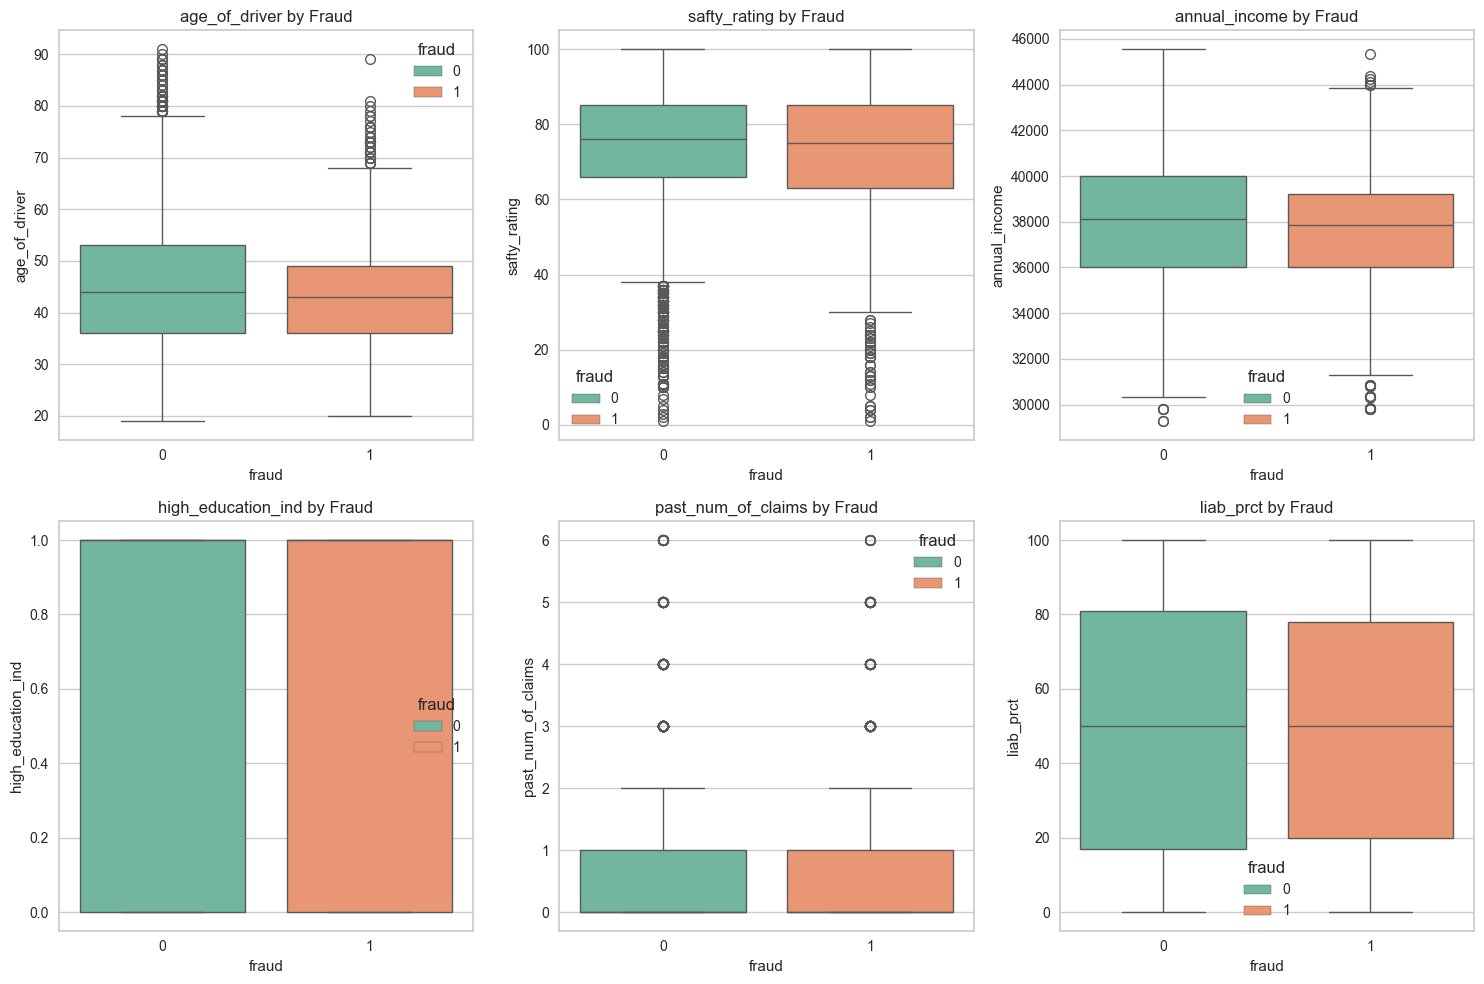

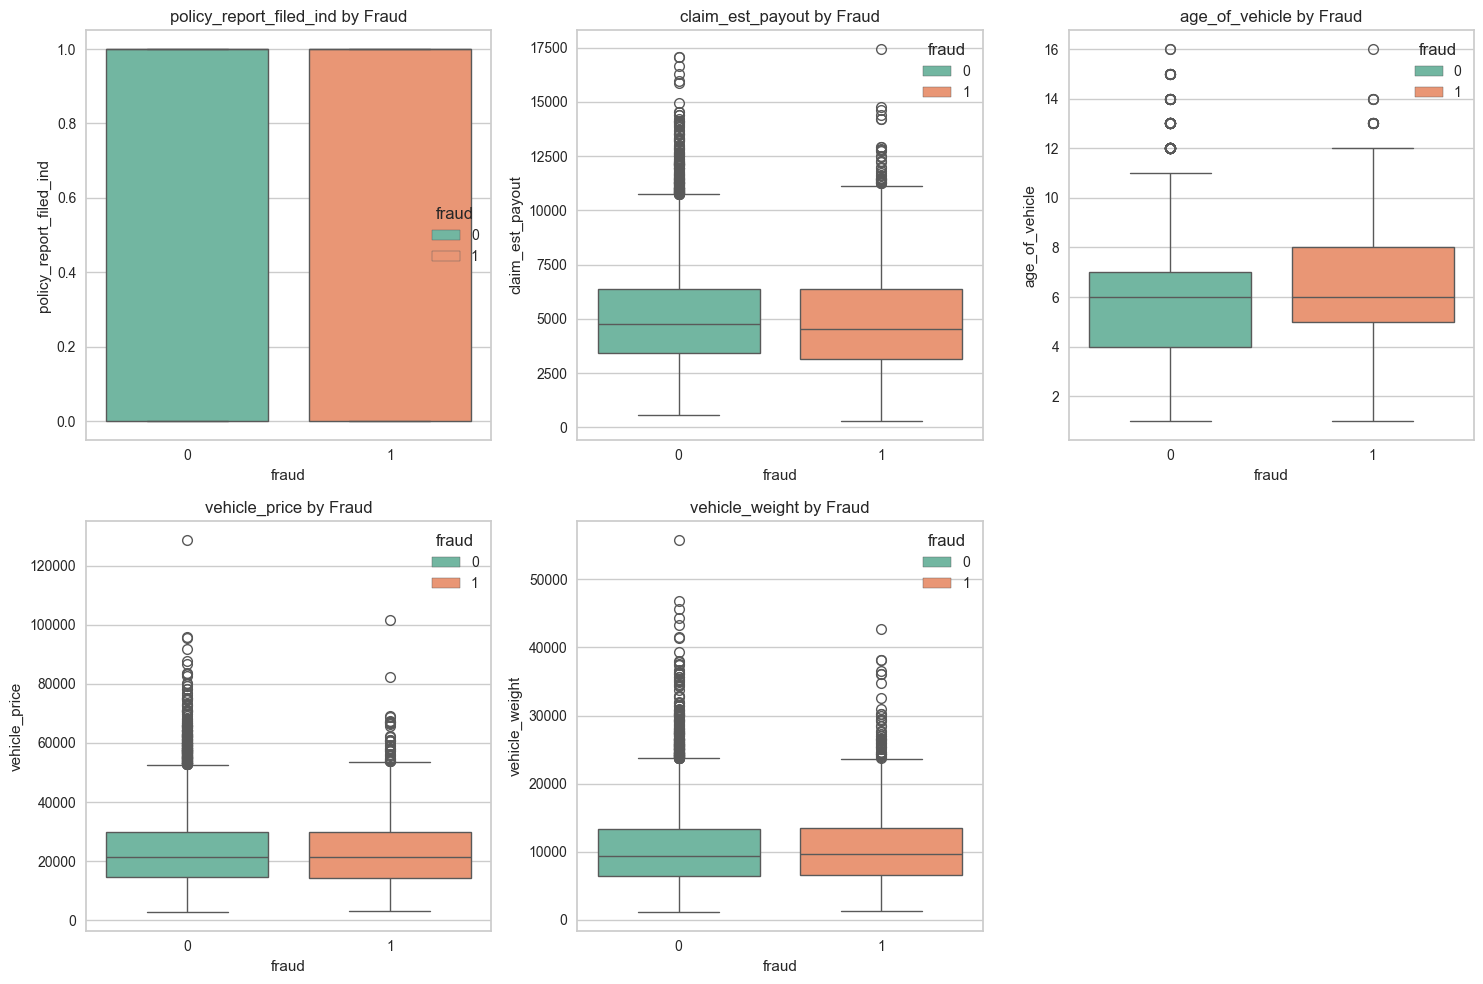

In [75]:
colors = sns.color_palette("Set2")

# 첫 번째 그룹
numerical_columns_1 = numerical_columns[:6]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns_1):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='fraud', y=col, data=train, hue='fraud', palette=colors[:2], dodge=False)
    plt.title(f'{col} by Fraud')
plt.tight_layout()
plt.show()

# 두 번째 그룹
numerical_columns_2 = numerical_columns[6:-3]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns_2):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='fraud', y=col, data=train, hue='fraud', palette=colors[:2], dodge=False)
    plt.title(f'{col} by Fraud')
plt.tight_layout()
plt.show()


**사기 여부에 따른 범주형 변수들의 분포**

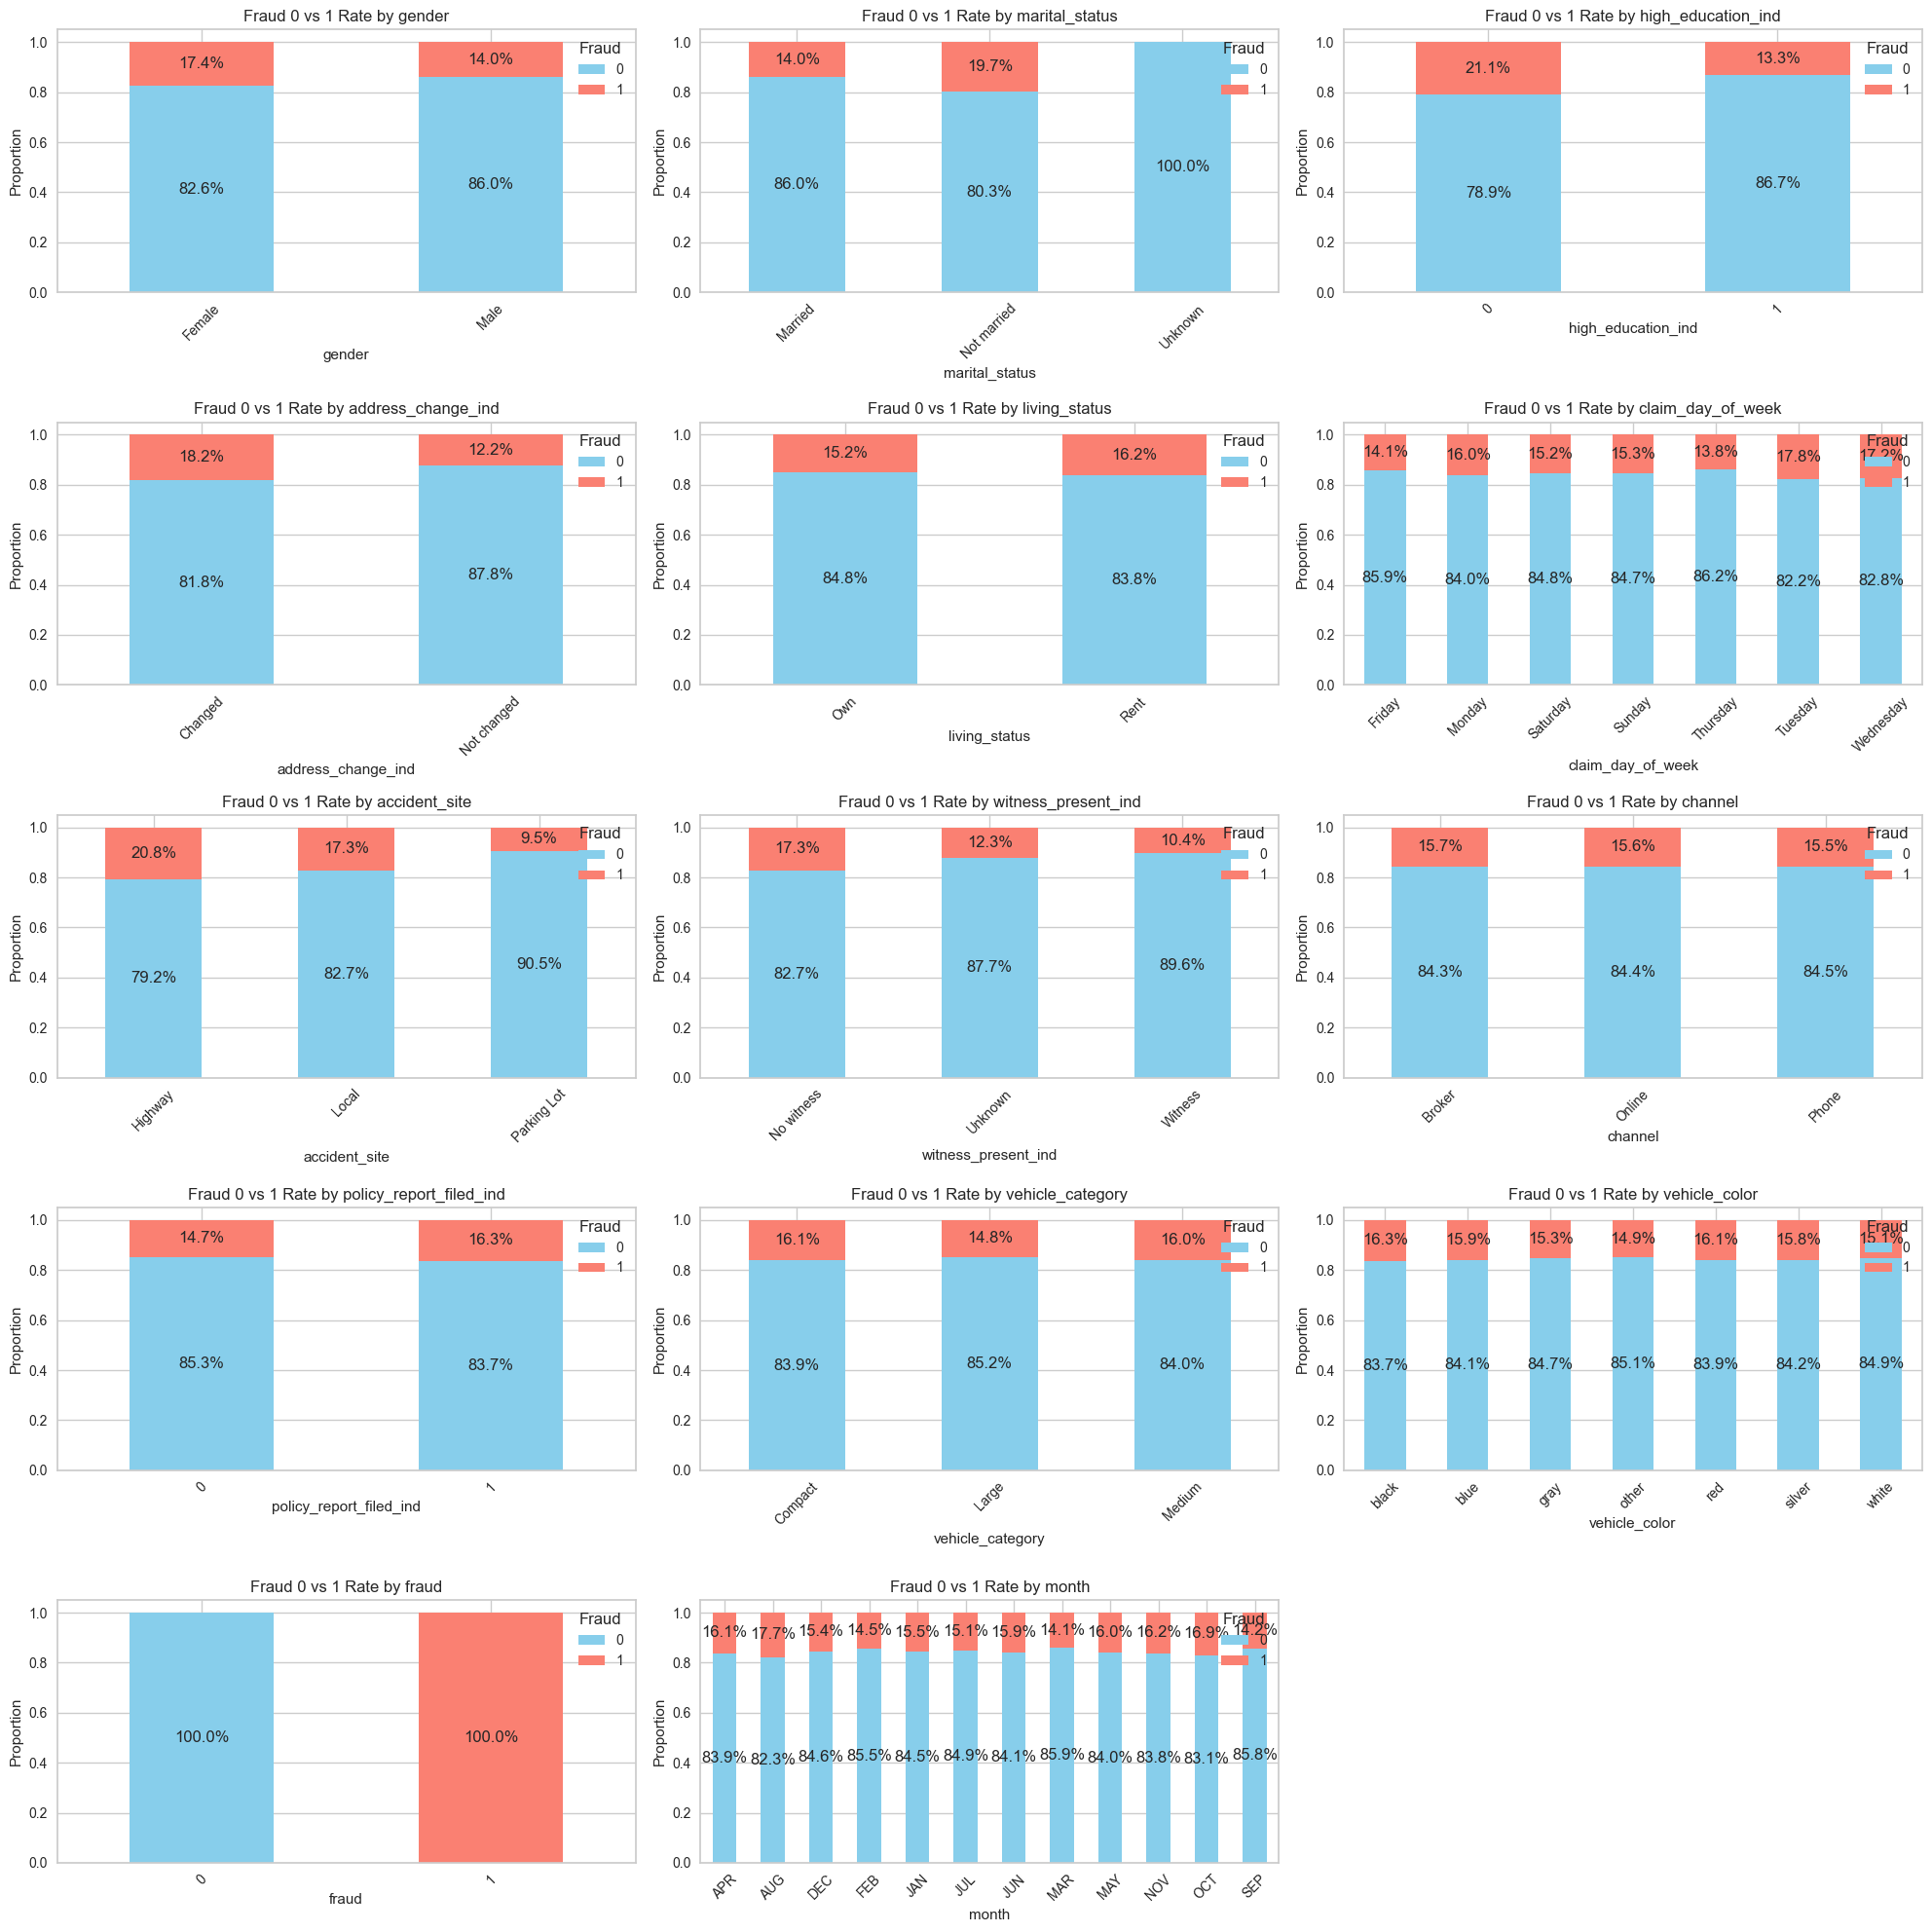

In [76]:
# 사기 여부에 따른 각 범주형 변수의 비율을 계산하고 시각화 (crosstab 사용)
plt.figure(figsize=(20, 20))

for i, col in enumerate(categorical_columns):
    plt.subplot(5, 3, i + 1)
    prop_df = pd.crosstab(train[col], train['fraud'], normalize='index')
    prop_df.plot(kind='bar', stacked=True, ax=plt.gca(), color=['skyblue', 'salmon'])
    plt.title(f'Fraud 0 vs 1 Rate by {col}')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.legend(title='Fraud', loc='upper right')

    # 막대 위에 비율을 표시
    for p in plt.gca().patches:
        height = p.get_height()
        if height > 0:  # 높이가 0인 막대는 표시하지 않음
            plt.gca().text(p.get_x() + p.get_width() / 2, p.get_y() + height / 2,
                           f'{height*100:.1f}%', ha='center', va='center')

plt.tight_layout()
plt.show()


### **사기 사건이 시간에 따라 어떻게 변화하는지 시각화**

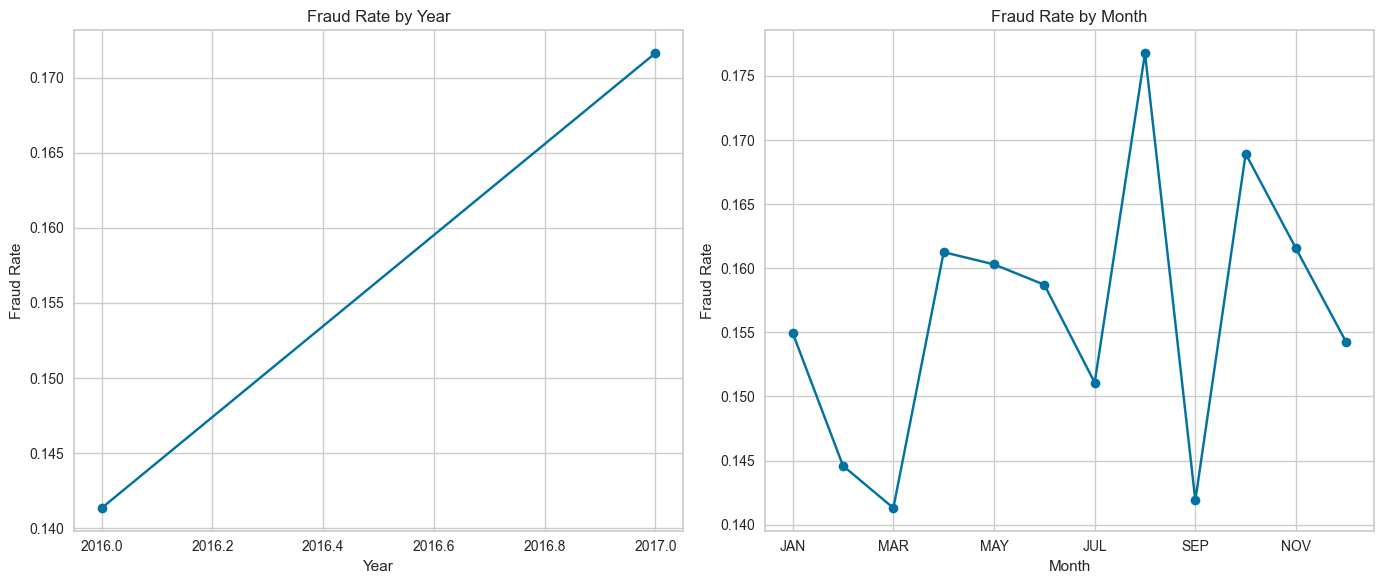

In [77]:
# 연도별 사기 사건 비율
fraud_by_year = train.groupby('year')['fraud'].mean()

# 월별 사기 사건 비율
month_order = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
fraud_by_month_ordered = train.groupby(pd.Categorical(train['month'], categories=month_order, ordered=True))['fraud'].mean()

# 시각화
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
fraud_by_year.plot(marker='o')
plt.title('Fraud Rate by Year')
plt.xlabel('Year')
plt.ylabel('Fraud Rate')

plt.subplot(1, 2, 2)
fraud_by_month_ordered.plot(marker='o')
plt.title('Fraud Rate by Month')
plt.xlabel('Month')
plt.ylabel('Fraud Rate')

plt.tight_layout()
plt.show()


# 2. 파생변수 제작

### 파생변수 제작
1. claim frequency factor
2. income to vehicle value ratio
3. income to age group mean (나이 범주 제작): 해당 연령대의 평균 소득에 비해 얼마나 자산을 가지고 있는지 
4. payout vs avg (과실 비율 범주 제작): 과실 비율에 따른 평균 지급된 보험금 비율보다 얼마나 적게/많게 받았는지 알 수 있는 변수

In [94]:
train['claim_frequency_factor'] = train['past_num_of_claims'] / train['age_of_vehicle']
train.head()

,ID,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,year,month,day,claim_frequency_factor
0,TRAIN_0000,33,Male,Married,34,35113.78,0,Changed,Own,Monday,Local,0,No witness,42,Broker,1,2748.61,8.0,Compact,19799.63,black,11640.448729,1,2017,JUL,18,0.000000
1,TRAIN_0001,44,Female,Married,90,38096.04,1,Changed,Own,Thursday,Local,0,No witness,98,Phone,0,6399.10,5.0,Compact,32068.53,blue,9139.610936,0,2016,JAN,1,0.000000
2,TRAIN_0002,29,Male,Not married,70,33753.00,1,Not changed,Rent,Tuesday,Local,0,No witness,1,Online,0,4639.07,10.0,Compact,20339.02,other,19810.168367,0,2016,JUL,14,0.000000
3,TRAIN_0003,33,Male,Married,79,35100.61,1,Changed,Rent,Tuesday,Highway,2,No witness,41,Broker,0,3698.98,7.0,Medium,9937.95,black,4428.144436,1,2017,JUN,14,0.285714
4,TRAIN_0004,51,Male,Married,46,39609.60,1,Changed,Rent,Sunday,Local,2,Witness,98,Broker,1,2084.32,4.0,Large,24504.03,other,10119.559384,0,2017,MAY,8,0.500000


In [95]:
train['income_to_vehicle_value_ratio'] = train['annual_income'] / train['vehicle_price']

In [96]:
# Define age groups
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
train['age_group'] = pd.cut(train['age_of_driver'], bins=bins, labels=labels, right=False)

# Calculate mean income per age group
mean_income_per_age_group = train.groupby('age_group')['annual_income'].mean().to_dict()

# Create a new column for income to age group mean income ratio
train['income_to_age_group_mean'] = train.apply(
    lambda row: row['annual_income'] / mean_income_per_age_group[row['age_group']], axis=1
)

# Show the first few rows to confirm
train[['age_of_driver', 'age_group', 'annual_income', 'income_to_age_group_mean']].head()


,age_of_driver,age_group,annual_income,income_to_age_group_mean
0,33,30-39,35113.78,0.985538
1,44,40-49,38096.04,0.999059
2,29,20-29,33753.00,1.033729
3,33,30-39,35100.61,0.985168
4,51,50-59,39609.60,0.987488


In [97]:
# 1. 과실 비율 범주화
bins = [0, 20, 40, 60, 80, 100]  # 과실 비율을 0-20%, 20-40%, ... 80-100%로 구간화
labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%']
train['liab_prct_category'] = pd.cut(train['liab_prct'], bins=bins, labels=labels) # 여기서는 right=False를 하면 안됨 

# 1-1. 0%의 경우도 첫번째 label에 해당되게끔 값을 지정
train.loc[train['liab_prct']==0, 'liab_prct_category'] = '0-20%'

# 2. 범주별 평균 보험금 지급 비율 계산
avg_payout_by_category = train.groupby('liab_prct_category')['claim_est_payout'].mean()

# 3. 각 청구에 대한 평균 보험금 지급 비율을 데이터프레임에 추가
train['avg_claim_est_payout'] = train['liab_prct_category'].map(avg_payout_by_category)

# 4. avg_claim_est_payout을 숫자형(float)으로 변환
train['avg_claim_est_payout'] = train['avg_claim_est_payout'].astype(float)

# 5. 각 청구에 대해 실제 보험금 지급 비율과 평균의 차이를 계산
train['payout_vs_avg'] = train['claim_est_payout'] - train['avg_claim_est_payout']

# 결과 확인
train[['liab_prct', 'liab_prct_category', 'claim_est_payout', 'avg_claim_est_payout', 'payout_vs_avg']].head()

,liab_prct,liab_prct_category,claim_est_payout,avg_claim_est_payout,payout_vs_avg
0,42,41-60%,2748.61,5086.637193,-2338.027193
1,98,81-100%,6399.10,5131.983720,1267.116280
2,1,0-20%,4639.07,4980.078785,-341.008785
3,41,41-60%,3698.98,5086.637193,-1387.657193
4,98,81-100%,2084.32,5131.983720,-3047.663720


### 불필요한 변수 제거

In [98]:
train=train.drop(columns=['ID','age_group','avg_claim_est_payout','liab_prct_category'],axis =1)

# 3. 추가적인 전처리 및 변수 인코딩

In [99]:
# Convert the relevant columns to their appropriate data types

# Convert 'ind' columns to categorical types
train['gender'] = train['gender'].astype('category')
train['marital_status'] = train['marital_status'].astype('category')
train['high_education_ind'] = train['high_education_ind'].astype('category')
train['address_change_ind'] = train['address_change_ind'].astype('category')
train['living_status'] = train['living_status'].astype('category')
train['claim_day_of_week'] = train['claim_day_of_week'].astype('category')
train['accident_site'] = train['accident_site'].astype('category')
train['witness_present_ind'] = train['witness_present_ind'].astype('category')
train['channel'] = train['channel'].astype('category')
train['policy_report_filed_ind'] = train['policy_report_filed_ind'].astype('category')
train['vehicle_category'] = train['vehicle_category'].astype('category')
train['vehicle_color'] = train['vehicle_color'].astype('category')
train['fraud'] = train['fraud'].astype('category')

# Convert numerical columns to the correct numeric types
train['income_to_age_group_mean'] = pd.to_numeric(train['income_to_age_group_mean'])
train['income_to_vehicle_value_ratio'] = pd.to_numeric(train['income_to_vehicle_value_ratio'])
train['payout_vs_avg'] = pd.to_numeric(train['payout_vs_avg'])
train['claim_frequency_factor'] = pd.to_numeric(train['claim_frequency_factor'])

# Display the updated dataframe's dtypes to confirm the changes
train.dtypes


age_of_driver                       int64
gender                           category
marital_status                   category
safty_rating                        int64
annual_income                     float64
high_education_ind               category
address_change_ind               category
living_status                    category
claim_day_of_week                category
accident_site                    category
past_num_of_claims                  int64
witness_present_ind              category
liab_prct                           int64
channel                          category
policy_report_filed_ind          category
claim_est_payout                  float64
age_of_vehicle                    float64
vehicle_category                 category
vehicle_price                     float64
vehicle_color                    category
vehicle_weight                    float64
fraud                            category
year                                int64
month                             

### 여러 전처리 조합 + pycaret

In [101]:
def preprocess_data(data, missing_value_strategy, sampling_strategy, remove_corr_var=True):
    # 1. 결측치 처리
    if missing_value_strategy == 'mean':
        data = data.fillna(data.select_dtypes(include='number').mean())
    elif missing_value_strategy == 'drop':
        data = data.dropna()

    # 2. 범주형 변수 인코딩
    label_encoders = {}
    for column in data.select_dtypes(include=['object', 'category']).columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

    # 3. 변수 선택 (상관관계 높은 변수 중 하나 제거)
    if remove_corr_var:
        numeric_data = data.select_dtypes(include=['number'])
        corr_matrix = numeric_data.corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
        print(to_drop)

        data = data.drop(columns=to_drop)

    # 4. 샘플링 전략 적용
    if sampling_strategy == 'undersampling':
        X = data.drop('fraud', axis=1)
        y = data['fraud']
        rus = RandomUnderSampler(random_state=42)
        X_res, y_res = rus.fit_resample(X, y)
        data = pd.concat([X_res, y_res], axis=1)
    elif sampling_strategy == 'oversampling':
        X = data.drop('fraud', axis=1)
        y = data['fraud']
        smote = SMOTE(random_state=42)
        X_res, y_res = smote.fit_resample(X, y)
        data = pd.concat([X_res, y_res], axis=1)

    return data

def run_pycaret_setup_and_compare(data):
    # PyCaret 환경 설정
    exp_clf = setup(data=data, target='fraud', normalize=True, 
                    normalize_method='minmax', session_id=42)

    # 모델 비교 및 최적 모델 선정
    best_model = compare_models()

    # 최적 모델의 세부 정보 추출
    model_metrics = pull()
    best_model_name = model_metrics.iloc[0]['Model']
    best_precision = model_metrics.iloc[0]['Prec.']
    best_accuracy = model_metrics.iloc[0]['Accuracy']
    best_recall = model_metrics.iloc[0]['Recall']
    best_f1 = model_metrics.iloc[0]['F1']

    return best_model_name, best_precision, best_accuracy, best_recall, best_f1


# 조합 1: 결측치 평균 처리, 언더샘플링, 상관관계 높은 변수 삭제
processed_data_1 = preprocess_data(train.copy(), 'mean', 'undersampling')
result_1 = run_pycaret_setup_and_compare(processed_data_1)

# 조합 2: 결측치 평균 처리, 오버샘플링, 상관관계 높은 변수 삭제
processed_data_2 = preprocess_data(train.copy(), 'mean', 'oversampling')
result_2 = run_pycaret_setup_and_compare(processed_data_2)

# 조합 3: 결측치 행 삭제, 언더샘플링, 상관관계 높은 변수 삭제
processed_data_3 = preprocess_data(train.copy(), 'drop', 'undersampling')
result_3 = run_pycaret_setup_and_compare(processed_data_3)

# 조합 3: 결측치 행 삭제, 오버샘플링, 상관관계 높은 변수 삭제
processed_data_4 = preprocess_data(train.copy(), 'drop', 'oversampling')
result_4 = run_pycaret_setup_and_compare(processed_data_4)

print("Result 1:", result_1)
print("Result 2:", result_2)
print("Result 3:", result_3)
print('Result 4:', result_4)

['payout_vs_avg']


,Description,Value
0,Session id,42
1,Target,fraud
2,Target type,Binary
3,Original data shape,"(3942, 28)"
4,Transformed data shape,"(3942, 28)"
5,Transformed train set shape,"(2759, 28)"
6,Transformed test set shape,"(1183, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.6546,0.7121,0.6652,0.6520,0.6581,0.3092,0.3097,0.1230
ada,Ada Boost Classifier,0.6481,0.7094,0.6355,0.6526,0.6436,0.2961,0.2966,0.0340
catboost,CatBoost Classifier,0.6477,0.7130,0.6667,0.6429,0.6543,0.2954,0.2958,0.3690
lda,Linear Discriminant Analysis,0.6412,0.7012,0.6362,0.6434,0.6394,0.2824,0.2828,0.0050
ridge,Ridge Classifier,0.6401,0.7013,0.6355,0.6422,0.6385,0.2802,0.2805,0.0050
lr,Logistic Regression,0.6386,0.7010,0.6355,0.6405,0.6377,0.2773,0.2776,0.2500
lightgbm,Light Gradient Boosting Machine,0.6386,0.7028,0.6457,0.6380,0.6415,0.2773,0.2775,0.2260
rf,Random Forest Classifier,0.6350,0.6880,0.6514,0.6311,0.6410,0.2700,0.2703,0.0620
nb,Naive Bayes,0.6292,0.6860,0.5428,0.6596,0.5939,0.2585,0.2639,0.0050
xgboost,Extreme Gradient Boosting,0.6267,0.6744,0.6442,0.6236,0.6334,0.2533,0.2537,0.0250


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

['payout_vs_avg']


,Description,Value
0,Session id,42
1,Target,fraud
2,Target type,Binary
3,Original data shape,"(21254, 28)"
4,Transformed data shape,"(21254, 28)"
5,Transformed train set shape,"(14877, 28)"
6,Transformed test set shape,"(6377, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8934,0.9476,0.8416,0.9389,0.8876,0.7868,0.7911,1.1010
lightgbm,Light Gradient Boosting Machine,0.8923,0.9470,0.8418,0.9365,0.8866,0.7846,0.7888,0.2490
xgboost,Extreme Gradient Boosting,0.8922,0.9479,0.8523,0.9266,0.8878,0.7845,0.7872,0.0440
rf,Random Forest Classifier,0.8822,0.9451,0.8459,0.9121,0.8777,0.7643,0.7664,0.2910
gbc,Gradient Boosting Classifier,0.8752,0.9383,0.8439,0.9004,0.8711,0.7504,0.7520,0.6930
et,Extra Trees Classifier,0.8665,0.9346,0.8490,0.8799,0.8641,0.7330,0.7336,0.1470
ada,Ada Boost Classifier,0.8527,0.9256,0.8572,0.8498,0.8534,0.7055,0.7056,0.1570
qda,Quadratic Discriminant Analysis,0.8088,0.8837,0.8281,0.7974,0.8124,0.6175,0.6180,0.0090
lda,Linear Discriminant Analysis,0.8012,0.8775,0.8103,0.7960,0.8030,0.6023,0.6026,0.0110
dt,Decision Tree Classifier,0.8007,0.8007,0.8158,0.7920,0.8037,0.6014,0.6018,0.0340


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

['payout_vs_avg']


,Description,Value
0,Session id,42
1,Target,fraud
2,Target type,Binary
3,Original data shape,"(3936, 28)"
4,Transformed data shape,"(3936, 28)"
5,Transformed train set shape,"(2755, 28)"
6,Transformed test set shape,"(1181, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6505,0.7008,0.6473,0.6528,0.6493,0.3010,0.3017,0.0070
ada,Ada Boost Classifier,0.6498,0.7037,0.6415,0.6529,0.6469,0.2995,0.2998,0.0350
lda,Linear Discriminant Analysis,0.6465,0.7004,0.6473,0.6471,0.6466,0.2930,0.2936,0.0070
ridge,Ridge Classifier,0.6461,0.7004,0.6437,0.6479,0.6449,0.2922,0.2930,0.0080
gbc,Gradient Boosting Classifier,0.6450,0.7067,0.6669,0.6392,0.6527,0.2901,0.2905,0.1240
rf,Random Forest Classifier,0.6399,0.7024,0.6597,0.6350,0.6469,0.2799,0.2803,0.0610
catboost,CatBoost Classifier,0.6392,0.7085,0.6560,0.6354,0.6454,0.2784,0.2787,0.3650
lightgbm,Light Gradient Boosting Machine,0.6385,0.6899,0.6567,0.6339,0.6450,0.2770,0.2773,0.2410
et,Extra Trees Classifier,0.6334,0.6838,0.6466,0.6312,0.6385,0.2668,0.2671,0.0490
xgboost,Extreme Gradient Boosting,0.6283,0.6737,0.6400,0.6259,0.6323,0.2567,0.2573,0.0240


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

['payout_vs_avg']


,Description,Value
0,Session id,42
1,Target,fraud
2,Target type,Binary
3,Original data shape,"(21224, 28)"
4,Transformed data shape,"(21224, 28)"
5,Transformed train set shape,"(14856, 28)"
6,Transformed test set shape,"(6368, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8942,0.9476,0.8450,0.9373,0.8887,0.7884,0.7923,1.0390
xgboost,Extreme Gradient Boosting,0.8914,0.9469,0.8526,0.9244,0.8870,0.7827,0.7852,0.0440
lightgbm,Light Gradient Boosting Machine,0.8913,0.9460,0.8428,0.9334,0.8857,0.7826,0.7864,0.2410
rf,Random Forest Classifier,0.8808,0.9445,0.8449,0.9103,0.8764,0.7616,0.7636,0.3170
gbc,Gradient Boosting Classifier,0.8708,0.9369,0.8450,0.8911,0.8674,0.7416,0.7427,0.7050
et,Extra Trees Classifier,0.8676,0.9357,0.8526,0.8790,0.8656,0.7352,0.7356,0.1480
ada,Ada Boost Classifier,0.8522,0.9266,0.8576,0.8486,0.8530,0.7045,0.7046,0.1620
qda,Quadratic Discriminant Analysis,0.8139,0.8868,0.8168,0.8124,0.8144,0.6278,0.6280,0.0100
lda,Linear Discriminant Analysis,0.8069,0.8834,0.8199,0.7993,0.8094,0.6139,0.6142,0.0140
ridge,Ridge Classifier,0.8065,0.8832,0.8199,0.7987,0.8091,0.6131,0.6134,0.0090


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Result 1: ('Gradient Boosting Classifier', 0.652, 0.6546, 0.6652, 0.6581)
Result 2: ('CatBoost Classifier', 0.9389, 0.8934, 0.8416, 0.8876)
Result 3: ('Logistic Regression', 0.6528, 0.6505, 0.6473, 0.6493)
Result 4: ('CatBoost Classifier', 0.9373, 0.8942, 0.845, 0.8887)


['payout_vs_avg']


,Description,Value
0,Session id,42
1,Target,fraud
2,Target type,Binary
3,Original data shape,"(21224, 28)"
4,Transformed data shape,"(21224, 28)"
5,Transformed train set shape,"(14856, 28)"
6,Transformed test set shape,"(6368, 28)"
7,Numeric features,27
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8917,0.9502,0.8439,0.9330,0.8862,0.7833,0.7869
1,0.9058,0.9567,0.8533,0.9534,0.9006,0.8116,0.8161
2,0.8964,0.9448,0.8452,0.9415,0.8908,0.7927,0.7969
3,0.8863,0.9451,0.8412,0.9246,0.8809,0.7725,0.7757
4,0.8984,0.9501,0.8600,0.9315,0.8943,0.7968,0.7991
5,0.9125,0.9557,0.8587,0.9623,0.9075,0.8250,0.8299
6,0.8902,0.9395,0.8264,0.9475,0.8828,0.7805,0.7870
7,0.8761,0.9408,0.8398,0.9057,0.8715,0.7522,0.7542
8,0.8923,0.9501,0.8423,0.9356,0.8865,0.7845,0.7884


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

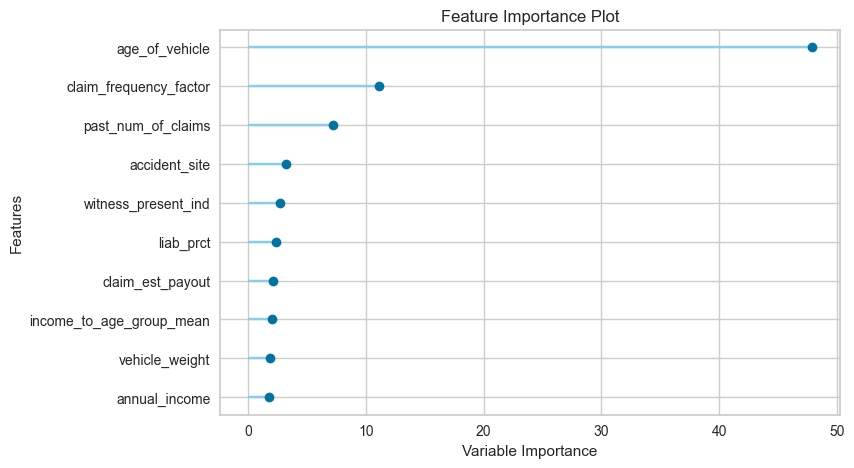

In [102]:
from pycaret.classification import create_model, plot_model

# PyCaret 환경 설정
processed_data_4 = preprocess_data(train.copy(), 'drop', 'oversampling')
exp_clf = setup(data=processed_data_4, target='fraud', normalize=True, 
                normalize_method='minmax', session_id=42)

# CatBoost 모델 생성
catboost_model = create_model('catboost')

# 변수 중요도 시각화
plot_model(catboost_model, plot='feature')

# 변수 중요도 플롯을 출력
plt.show()